<img src="https://camo.githubusercontent.com/db6bd56a6ead4c0d902278e7c1f642ea166d9ddd/687474703a2f2f69636f6e732e69636f6e617263686976652e636f6d2f69636f6e732f746865686f74682f73656f2f3235362f73656f2d70616e64612d69636f6e2e706e67" style="float: left; margin: 20px; height: 55px">

# Pandas

_Author: Alfred Zou_

---

## Pandas Intro
---
* Pandas is a popular python package for storing, cleaning and manipulating data
* It is widely used by data analysts/scientists
* It introduces two useful classes for storing data
    * Series - data stored in a single colum
    * DataFrame - data stored in a matrix or a table, or a collection of series
* These classes provide useful methods for exploring, cleaning, summarising and analysing data

## Pandas Limitations
---
* Pandas is not good at storing data when it gets too large
* It also runs on 1 core, which affects speed. This is a limitation imposed by python
* Alternatives include using Dask, which allows pandas to run on multiple cores
* If there is too much data, big data languages such as hadoop and spark must be used

## Pandas Basics
---
* I will explain Pandas by first explaining the different methods we can get data into a DataFrame
* Then we'll learn basic techniques to navigate and manipulate a DataFrame
* After that we'll look at some exploratory data analysis techniques
* The typical workflow is load the data, explore the data and clean it along the way

### Series and DataFrame Datatypes
---
* Pandas uses different datatypes to store its values in each Series or DataFrame column
* They are quite similar to np and python datatypes
* Note that mixed values or strings are stored as an object datatype in Pandas
* When a Series or DataFrame column are created, they will use the widest datatype to store all values

<img src="https://pbpython.com/images/pandas_dtypes.png" style="height:300px;margin-left:auto;margin-right:auto">

In [1]:
# Note the dtype is an object due to a string element
# Pd is creating the widest possible storage type for the data
import pandas as pd

a = [1,2,3,'string']
a = pd.Series(a)
print(a)
a.dtype

0         1
1         2
2         3
3    string
dtype: object


dtype('O')

### Creating Series and DataFrame Objects
---

In [2]:
# Creating Series using pd.Series()
a = [1,2,3,4]
a = pd.Series(a)
print(type(a))
a

<class 'pandas.core.series.Series'>


0    1
1    2
2    3
3    4
dtype: int64

In [3]:
# Creating DataFrame using pd.DataFrame()
a = [1,2,3,4]
a = pd.DataFrame(a)
print(type(a))
a

<class 'pandas.core.frame.DataFrame'>


,0
0,1
1,2
2,3
3,4


In [4]:
# Creating DataFrame using pd.DataFrame() from nested lists
a = [[1,2,3,4],[1,2,3,4]]
pd.DataFrame(a)

,0,1,2,3
0,1,2,3,4
1,1,2,3,4


In [5]:
# Creating DataFrame using pd.DataFrame() from nested lists & changing columns and index
col = ['a','b','c','d']
a = [[1,2,3,4],[1,2,3,4]]
pd.DataFrame(a,columns=col,index=['A','B'])

,a,b,c,d
A,1,2,3,4
B,1,2,3,4


In [6]:
# Creating DataFrame using pd.DataFrame() from dictionary
# Where the keys become column names
a = {'a':[1,1],'b':[2,2],'c':[3,3],'d':[4,4]}
pd.DataFrame(a)

,a,b,c,d
0,1,2,3,4
1,1,2,3,4


In [7]:
# Creating DataFrame using pd.Dataframe() from numpy matrix
import numpy as np
a = np.random.randint(0,10,size=(2,4))
pd.DataFrame(a)

,0,1,2,3
0,6,2,8,0
1,6,5,9,9


In [155]:
# Creating DataFrame using pd.Dataframe() from csv file
# If the headers aren't included in the csv, set the header argument = 1
# If the separater isn't a ',', change the sep argument 
df = pd.read_csv('Data/earthquakes.csv')
df.head()

,earthquake id,occurred_on,latitude,longitude,depth,magnitude,calculation_method,network_id,place,cause
0,1,1/01/1969 9:07,51.096,-179.392,45.0,5.6,mw,iscgem812771,"Andreanof Islands, Aleutian Islands, Alaska",earthquake
1,2,2/01/1969 17:50,-56.096,-27.842,80.1,6.0,mw,iscgemsup812819,South Sandwich Islands region,earthquake
2,3,3/01/1969 3:16,37.140,57.899,10.0,5.5,mw,iscgem812826,Turkmenistan-Iran border region,earthquake
3,4,3/01/1969 13:28,51.132,-179.306,15.0,5.9,mw,iscgem812841,"Andreanof Islands, Aleutian Islands, Alaska",earthquake
4,5,4/01/1969 22:36,-6.850,129.821,105.0,5.8,mw,iscgem812879,Banda Sea,earthquake


### Saving .csv Files
---

In [158]:
# Lets use the df we open, filter out some columns and save it
# Saving the altered df
# Set index to false, to not print the index as a column to the csv
df[['earthquake id','magnitude']].to_csv('Data/earthquakes2.csv',index=False)

In [159]:
# Reading the csv, we can see we have sucessfully saved a df with columns 'earthquakes id' & 'magnitude'
pd.read_csv('Data/earthquakes2.csv').head()

,earthquake id,magnitude
0,1,5.6
1,2,6.0
2,3,5.5
3,4,5.9
4,5,5.8


### Navigating DataFrames
---

In [2]:
# We load the iris dataset from seaborn
# We use .head() to show the first 5 entries of a dataset
# This is important when we have large datasets and we want to have a quick peek, and also prevents printing out the whole df
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Indexing DataFrames
---

##### Indexing Columns
* It's good practice to index with df['col_name'] rather than df.col_name
* This is because df.col_name doesn't work for column names with spaces or other special characters. Underscores are acceptable

In [10]:
# Not recommended way of indexing columns
df.sepal_length.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

In [11]:
# Recommended way of indexing columns
# This way of indexing is very similar to a dictionary
# We can think of df being the dictionary and we're calling the columns as keys
# Using single bracket returns a Series
df['sepal_length'].head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

In [12]:
# Using double brackets returns a df
df[['sepal_length']].head()

,sepal_length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


In [13]:
# Unlike dictionaries, dfs can index multiple columns
df[['sepal_length','sepal_width']].head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


#### Indexing Rows and Elements
---
* There are two methods for indexing rows and elements:
    * .iloc[m,n] - interger based location. Where m is the row position and n is the column position
    * .loc['index_name','column_name'] - index and column name based location 

##### Indexing Rows with .iloc[]

In [14]:
# Creating a df to practice indexing specific data
exp = pd.DataFrame(np.arange(1,17).reshape(4,4),columns=['A','B','C','D'],index=['a','b','c','d'])
exp

,A,B,C,D
a,1,2,3,4
b,5,6,7,8
c,9,10,11,12
d,13,14,15,16


In [15]:
# Retrieving the first row by interger based location
exp.iloc[0]

A    1
B    2
C    3
D    4
Name: a, dtype: int32

In [16]:
# We can slice along the rows as well
exp.iloc[0:3]

,A,B,C,D
a,1,2,3,4
b,5,6,7,8
c,9,10,11,12


In [17]:
# We can also get an elmenet
exp.iloc[0,0]

1

In [18]:
# And a slice of elements
exp.iloc[0:2,0:2]

,A,B
a,1,2
b,5,6


In [19]:
# Works for columns as well
exp.iloc[:,1:3]

,B,C
a,2,3
b,6,7
c,10,11
d,14,15


##### Indexing Rows with .loc[]


In [146]:
# Via index name we're retrieving row 'a'
exp.loc['a']

A    1
B    2
C    3
D    4
Name: a, dtype: int32

In [147]:
# Similarly a slice of rows
exp.loc[['a','b']]

,A,B,C,D
a,1,2,3,4
b,5,6,7,8


In [22]:
# Retrieving the first value
exp.loc['a','A']

1

In [23]:
# Slice of elements
exp.loc[['a','b'],['A','B']]

,A,B
a,1,2
b,5,6


In [24]:
# Slicing works for columns
exp.loc[:,['B','C']]

,B,C
a,2,3
b,6,7
c,10,11
d,14,15


In [153]:
# Slicing works for rows
exp.loc['b':'d']

,A,B,C,D
b,5,6,7,8
c,9,10,11,12
d,13,14,15,16


In [151]:
# We can slice by feeding in index and column names as well
exp.loc['b':'d','A':'C']

,A,B,C
b,5,6,7
c,9,10,11
d,13,14,15


### Column and Index Names
---

##### .head() and .tail()

In [25]:
# We load the iris dataset from seaborn
# We use .head() to show the first 5 entries of a dataset
# This is important when we have large datasets and we want to have a quick peek, and also prevents printing out the whole df
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
# We can also use tail to look at the bottom 5 rows
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


##### Column Names

In [27]:
# Let's first look at how to retrieve the column names
# In this case it would be sepal_length, sepal_width, petal_length, petal_width and species
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [28]:
# We can change these column names if we want
# It's important for a lot of datasets where the column name are non-intuitive and have an associated codebook, see link in next cell
df.columns = ['sepL','sepW','petL','petW','species']
df.head()

,sepL,sepW,petL,petW,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


[For example for a pregnancy survey, a codebook is used for column names](https://www.cdc.gov/nchs/nsfg/nsfg_cycle6.htm)

In [29]:
# We can also change a column name without passing the whole column list if we wanted to
df = df.rename(columns={'species':'type'})
df

,sepL,sepW,petL,petW,type
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [30]:
# Resetting the df
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [31]:
# Sometimes we receive columns in this format
df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
df.columns = [i.lower().replace(' ', '_') for i in df.columns]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


##### Index Names

In [33]:
# Resetting the df
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
# Retrieving the index
df.index

RangeIndex(start=0, stop=150, step=1)

In [35]:
# We can also update the index per a column of the df, this is useful if there is already a id column
df.index = df['sepal_length']
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,,,,,
5.1,5.1,3.5,1.4,0.2,setosa
4.9,4.9,3.0,1.4,0.2,setosa
4.7,4.7,3.2,1.3,0.2,setosa
4.6,4.6,3.1,1.5,0.2,setosa
5.0,5.0,3.6,1.4,0.2,setosa


In [36]:
# We can also update the index per a column of the df, this is useful if there is already a id column
df.index = [i+5 for i in range(150)]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
5,5.1,3.5,1.4,0.2,setosa
6,4.9,3.0,1.4,0.2,setosa
7,4.7,3.2,1.3,0.2,setosa
8,4.6,3.1,1.5,0.2,setosa
9,5.0,3.6,1.4,0.2,setosa


In [37]:
# We can also change a index name without passing the whole index list if we wanted to
df = df.rename(index={df.index[2]:15})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
5,5.1,3.5,1.4,0.2,setosa
6,4.9,3.0,1.4,0.2,setosa
15,4.7,3.2,1.3,0.2,setosa
8,4.6,3.1,1.5,0.2,setosa
9,5.0,3.6,1.4,0.2,setosa


In [38]:
# We can also reset the index 
# If we don't change drop=False, it'll add the previous index as a column into the df
df = df.reset_index()
df.head()

,index,sepal_length,sepal_width,petal_length,petal_width,species
0,5,5.1,3.5,1.4,0.2,setosa
1,6,4.9,3.0,1.4,0.2,setosa
2,15,4.7,3.2,1.3,0.2,setosa
3,8,4.6,3.1,1.5,0.2,setosa
4,9,5.0,3.6,1.4,0.2,setosa


### Creating and Removing Columns and Rows
---

##### Deleting
* We can delete columns and rows by either calling the row/index name or by referencing their integer based location
* I recommend going by row/index name

In [39]:
# Resetting the df
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [40]:
# Let's delete the column
# We need to denote axis=1 for columns
df.drop('sepal_width',axis=1)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [41]:
# We can drop multiple columns as well
df.drop(columns=['sepal_length','petal_length']).head()

,sepal_width,petal_width,species
0,3.5,0.2,setosa
1,3.0,0.2,setosa
2,3.2,0.2,setosa
3,3.1,0.2,setosa
4,3.6,0.2,setosa


In [42]:
# Let's delete a row as well, by calling the index name
df = df.drop(4)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [43]:
# We can also just select the columns we want
# This also lets us rearrange our columns
df = df[['species','petal_length','petal_width']]
df

,species,petal_length,petal_width
0,setosa,1.4,0.2
1,setosa,1.4,0.2
2,setosa,1.3,0.2
3,setosa,1.5,0.2
5,setosa,1.7,0.4
...,...,...,...
145,virginica,5.2,2.3
146,virginica,5.0,1.9
147,virginica,5.2,2.0
148,virginica,5.4,2.3


##### Creating TBC
Creating columns using .apply(lambda x : x[0] + x[1])
df.iloc[mask,col] = 


In [44]:
# Resetting the df
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [45]:
df['petal_width'].replace(0.2,1.4,inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,1.4,setosa
1,4.9,3.0,1.4,1.4,setosa
2,4.7,3.2,1.3,1.4,setosa
3,4.6,3.1,1.5,1.4,setosa
4,5.0,3.6,1.4,1.4,setosa


In [46]:
# Not too exciting at the moment, but can be combined with functions and lambda expressions later on
df['new_col']='asdfg'
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,new_col
145,6.7,3.0,5.2,2.3,virginica,asdfg
146,6.3,2.5,5.0,1.9,virginica,asdfg
147,6.5,3.0,5.2,2.0,virginica,asdfg
148,6.2,3.4,5.4,2.3,virginica,asdfg
149,5.9,3.0,5.1,1.8,virginica,asdfg


In [47]:
# We can add in a new row using .loc[] at the end of the df
df.loc[148.5]=[5.0,6.0,3.0,2.9,'virginica','asdf']
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,new_col
146.0,6.3,2.5,5.0,1.9,virginica,asdfg
147.0,6.5,3.0,5.2,2.0,virginica,asdfg
148.0,6.2,3.4,5.4,2.3,virginica,asdfg
149.0,5.9,3.0,5.1,1.8,virginica,asdfg
148.5,5.0,6.0,3.0,2.9,virginica,asdf


In [48]:
# Similarly we can change by interger based index too
df.iloc[150]=[3.0,3.0,3.0,3.9,'satosa','asdf']
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species,new_col
146.0,6.3,2.5,5.0,1.9,virginica,asdfg
147.0,6.5,3.0,5.2,2.0,virginica,asdfg
148.0,6.2,3.4,5.4,2.3,virginica,asdfg
149.0,5.9,3.0,5.1,1.8,virginica,asdfg
148.5,3.0,3.0,3.0,3.9,satosa,asdf


### Replacing Values
---

In [49]:
# Resetting the df
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [50]:
# We can manually assign the value
df.iloc[0,0]=100
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,100.0,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [51]:
# We can use .replace()
df['petal_width'].replace(0.2,1.4,inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,100.0,3.5,1.4,1.4,setosa
1,4.9,3.0,1.4,1.4,setosa
2,4.7,3.2,1.3,1.4,setosa
3,4.6,3.1,1.5,1.4,setosa
4,5.0,3.6,1.4,1.4,setosa


### Filtering
---
* Filtering in pd's involves passing the df a mask
* The mask is a Series of True and False boolean values

In [52]:
# Resetting the df
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [53]:
# Let's say we wanted to filter rows by sepal_length > 5
# We call the column series then apply boolean logic to it
print(df['sepal_length'].head())
df['sepal_length'] > 5

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64


0       True
1      False
2      False
3      False
4      False
       ...  
145     True
146     True
147     True
148     True
149     True
Name: sepal_length, Length: 150, dtype: bool

In [54]:
# To filter by sepal_length > 5, all we need to do is place that conditional statement as if we were indexing
df[df['sepal_length']>5].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa


In [55]:
# Similarly if we wanted to filter by the viriginica species
df[df['species']=='virginica'].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


##### Multiple Conditional Formatting

In [56]:
# What if we wanted the virginica species with petal_width > 2.0
# We need to use bitwise comparisons for elementwise logical operations
# This is because the Truth value of a np array, pd Series and pd DataFrame are ambiguous 
    # Is it true if they're not zero length, if all elements are True or at least one element is true
# The bitwise & corresponds to and
# The bitwise | corresponds to or
# The bitwise ~ corresponds to not
# Parentheses are needed between boolean logic, as by python default, & has a higher operator precidence 
df[(df['species']=='virginica') & (df['petal_width']>2)].head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
102,7.1,3.0,5.9,2.1,virginica
104,6.5,3.0,5.8,2.2,virginica
105,7.6,3.0,6.6,2.1,virginica
109,7.2,3.6,6.1,2.5,virginica


In [57]:
# What if we wanted the virginica species or sepal_length > 6.5
df[(df['species']=='virginica') | (df['sepal_length']>6.5)]

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
52,6.9,3.1,4.9,1.5,versicolor
58,6.6,2.9,4.6,1.3,versicolor
65,6.7,3.1,4.4,1.4,versicolor
75,6.6,3.0,4.4,1.4,versicolor
76,6.8,2.8,4.8,1.4,versicolor
77,6.7,3.0,5.0,1.7,versicolor
86,6.7,3.1,4.7,1.5,versicolor
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica


In [58]:
# What if we wanted sepal_length > 5 but not versicolor
df[(df['sepal_length']>5) & ~(df['species']=='versicolor')].head(20)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
16,5.4,3.9,1.3,0.4,setosa
17,5.1,3.5,1.4,0.3,setosa
18,5.7,3.8,1.7,0.3,setosa
19,5.1,3.8,1.5,0.3,setosa
20,5.4,3.4,1.7,0.2,setosa


##### Chained Indexing and Value Assignment
* Chained indexing is applying an index twice, or an index on an index
* For a df we can index in three ways: df[], df.iloc & df.loc
* Any combination of those 3, more than once indicates chained indexing
* We may need to use chained indexing if we want to filter a df and then look at specific columns
* For chained indexing this is fine
* However, the issue for chained indexing is during value assignment
* For a chained index, the first index is either a view or copy of the original df
    * Changes to a view will cause chagnes in the df
    * Changes to a copy will not cause changes in the df
* When this happens we are unsure if its a view or copy, as it depends on the memory layout of the array
* This is an issue when we assign values to the view or copy, as there is uncertainty on its affect on the underlying df
* The preferred solution is to not used chained indexing for value assignment
* We can achieve this by using .loc[mask,[list_of_col]] = value
    * This will apply the mask to the df & replace with 'value' for requested columns
    * This value assignment is done inplace

<img src='https://www.dataquest.io/wp-content/uploads/2019/01/modifying.png' style='height:300px;margin-left:auto;margin-right:auto'>

In [59]:
# Resetting the df
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [60]:
# This is an example of chained indexing
# When we just want to look at the data, this is fine
df[df['sepal_length']>5][['petal_length','petal_width']]

,petal_length,petal_width
0,1.4,0.2
5,1.7,0.4
10,1.5,0.2
14,1.2,0.2
15,1.5,0.4
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [61]:
# This is an example of chained indexing value assignment
# pds is throwing us an error telling us that we might be assigning a value to a copy instead of the original df
df[df['sepal_length']>5][['petal_length','petal_width']] = 5

C:\Users\draciel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\draciel\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [62]:
# If we look at the original df, we can see that nothing changed
df[df['sepal_length']>5].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa


In [63]:
# The preferred approach is using .loc[]
# We can also filter with .loc[]
df.loc[df['sepal_length']>5]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [64]:
# We can apply the mask and select the output columns at the same time
df.loc[df['sepal_length']>5,['petal_length','petal_width']]

,petal_length,petal_width
0,1.4,0.2
5,1.7,0.4
10,1.5,0.2
14,1.2,0.2
15,1.5,0.4
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [65]:
# Assigning the values
df.loc[df['sepal_length']>5,['petal_length','petal_width']] = 5

In [66]:
# Looks like it worked this time
# We always know .loc[] will assign the values to the original df
df.loc[df['sepal_length']>5].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,5.0,5.0,setosa
5,5.4,3.9,5.0,5.0,setosa
10,5.4,3.7,5.0,5.0,setosa
14,5.8,4.0,5.0,5.0,setosa
15,5.7,4.4,5.0,5.0,setosa


##### Membership Testing

In [67]:
# Resetting the df
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [68]:
# What if we wanted species from a list
list = [0.2,0.4]
df[df['petal_width'].isin(list)]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
10,5.4,3.7,1.5,0.2,setosa
11,4.8,3.4,1.6,0.2,setosa


##### Regex

In [69]:
# What if we wanted species containing a string
df[df['species'].str.contains(r'set')].head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [70]:
# We can use the bitwise ~ if we want to find all species without the string
df[~df['species'].str.contains(r'set')].head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [71]:
# Here is a dataset containing emails
df = pd.read_csv('Data/au-500.csv')
df.head()

,first_name,last_name,company_name,address,city,state,post,phone1,phone2,email,web
0,Rebbecca,Didio,"Brandt, Jonathan F Esq",171 E 24th St,Leith,TAS,7315,03-8174-9123,0458-665-290,rebbecca.didio@didio.com.au,http://www.brandtjonathanfesq.com.au
1,Stevie,Hallo,Landrum Temporary Services,22222 Acoma St,Proston,QLD,4613,07-9997-3366,0497-622-620,stevie.hallo@hotmail.com,http://www.landrumtemporaryservices.com.au
2,Mariko,Stayer,"Inabinet, Macre Esq",534 Schoenborn St #51,Hamel,WA,6215,08-5558-9019,0427-885-282,mariko_stayer@hotmail.com,http://www.inabinetmacreesq.com.au
3,Gerardo,Woodka,Morris Downing & Sherred,69206 Jackson Ave,Talmalmo,NSW,2640,02-6044-4682,0443-795-912,gerardo_woodka@hotmail.com,http://www.morrisdowningsherred.com.au
4,Mayra,Bena,"Buelt, David L Esq",808 Glen Cove Ave,Lane Cove,NSW,1595,02-1455-6085,0453-666-885,mayra.bena@gmail.com,http://www.bueltdavidlesq.com.au


In [72]:
# Let's only look at the email column
# Let's use regex to separate the string before @ and string after @
df = df[['email']]
df.head()

,email
0,rebbecca.didio@didio.com.au
1,stevie.hallo@hotmail.com
2,mariko_stayer@hotmail.com
3,gerardo_woodka@hotmail.com
4,mayra.bena@gmail.com


In [73]:
# Using .str.extract() and grouping with parentheses, we've successfully extracted the string before and after @
df['email'].str.extract(r'(.*)@(.*)')

,0,1
0,rebbecca.didio,didio.com.au
1,stevie.hallo,hotmail.com
2,mariko_stayer,hotmail.com
3,gerardo_woodka,hotmail.com
4,mayra.bena,gmail.com
...,...,...
495,miles,hotmail.com
496,julio.mikel,mikel.net.au
497,aide.ghera,ghera.com.au
498,noelia,brackett.net.au


### Sorting
---

In [74]:
# Resetting the df
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [75]:
df.sort_values('sepal_length',ascending=True)

,sepal_length,sepal_width,petal_length,petal_width,species
13,4.3,3.0,1.1,0.1,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
41,4.5,2.3,1.3,0.3,setosa
...,...,...,...,...,...
122,7.7,2.8,6.7,2.0,virginica
118,7.7,2.6,6.9,2.3,virginica
117,7.7,3.8,6.7,2.2,virginica
135,7.7,3.0,6.1,2.3,virginica


In [76]:
df.sort_values('sepal_length',ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,species
131,7.9,3.8,6.4,2.0,virginica
135,7.7,3.0,6.1,2.3,virginica
122,7.7,2.8,6.7,2.0,virginica
117,7.7,3.8,6.7,2.2,virginica
118,7.7,2.6,6.9,2.3,virginica
...,...,...,...,...,...
41,4.5,2.3,1.3,0.3,setosa
42,4.4,3.2,1.3,0.2,setosa
38,4.4,3.0,1.3,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa


In [77]:
df.sort_values('species',ascending=True)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
27,5.2,3.5,1.5,0.2,setosa
28,5.2,3.4,1.4,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
30,4.8,3.1,1.6,0.2,setosa
...,...,...,...,...,...
119,6.0,2.2,5.0,1.5,virginica
120,6.9,3.2,5.7,2.3,virginica
121,5.6,2.8,4.9,2.0,virginica
111,6.4,2.7,5.3,1.9,virginica


In [78]:
df.sort_values('species',ascending=False)

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,virginica
111,6.4,2.7,5.3,1.9,virginica
122,7.7,2.8,6.7,2.0,virginica
121,5.6,2.8,4.9,2.0,virginica
120,6.9,3.2,5.7,2.3,virginica
...,...,...,...,...,...
31,5.4,3.4,1.5,0.4,setosa
30,4.8,3.1,1.6,0.2,setosa
29,4.7,3.2,1.6,0.2,setosa
28,5.2,3.4,1.4,0.2,setosa


### Grouping and Counting
---

In [80]:
# Resetting the df
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [81]:
# We can look at the unique values within a column using .unique()
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [82]:
# We can count the number of unique values using len()
len(df['species'].unique())

3

In [83]:
# Now say, we want to count the number of each type of these species
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [84]:
# Let's say we want to group by each species and look at their average sepal_length, sepal_width, petal_length and petal_width
df.groupby('species')

In [85]:
# We need to pass an aggregate function to the groupby object
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [86]:
# Similarly for .min(), .max() and .count()
df.groupby('species').min()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,4.3,2.3,1.0,0.1
versicolor,4.9,2.0,3.0,1.0
virginica,4.9,2.2,4.5,1.4


In [87]:
# Similarly for .min(), .max() and .count()
df.groupby('species').max()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.8,4.4,1.9,0.6
versicolor,7.0,3.4,5.1,1.8
virginica,7.9,3.8,6.9,2.5


In [88]:
# Similarly for .min(), .max() and .count()
df.groupby('species').count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


#### Multiple Groupbys

In [25]:
# loading dataset
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [30]:
# We can groupby multiple columns
df = df.groupby(['sex','time'])['total_bill','tip'].mean()
df

total_bill       tip
sex    time                        
Male   Lunch    18.048485  2.882121
       Dinner   21.461452  3.144839
Female Lunch    16.339143  2.582857
       Dinner   19.213077  3.002115

In [31]:
# The indexing is different now, supply a tuple for the index
df.loc[('Male','Lunch'),'tip']

2.8821212121212123

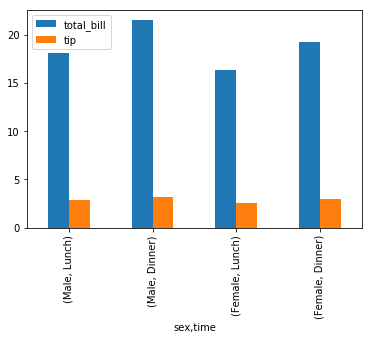

In [32]:
# We can plot it, but as you can see its not grouped by pclass now
df.plot(kind='bar')

In [37]:
# When we unstack we apply the inner index to the features
df.unstack(level=0)

total_bill                  tip          
sex          Male     Female      Male    Female
time                                            
Lunch   18.048485  16.339143  2.882121  2.582857
Dinner  21.461452  19.213077  3.144839  3.002115

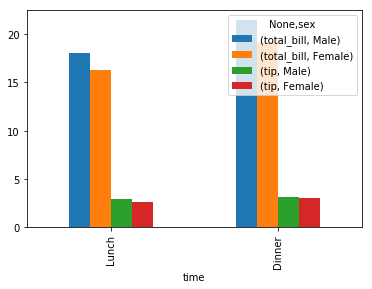

In [39]:
# When we plot it, we get a nice comparison between tipping amounts and total_bill between males and females
# This is best used when comparing two categories on the same scale and related to each other
# A better example, would be if the value of the tips and total_bill were similar
df.unstack(level=0).plot(kind='bar')

In [6]:
# Reset the index to remove the 
df.reset_index()

,pclass,embarked,age,fare
0,1,C,38.027027,104.718529
1,1,Q,38.500000,90.000000
2,1,S,38.152037,70.364862
3,2,C,22.766667,25.358335
4,2,Q,43.500000,12.350000
5,2,S,30.386731,20.327439
6,3,C,20.741951,11.214083
7,3,Q,25.937500,11.183393
8,3,S,25.696552,14.644083


### Datatype Conversion
---
* When we receive data, one of the most important steps is to check the datatypes of the columns
* If the data is wrong, we will need to clean and convert them to the correct type
* This is especially important for numerical data, which will allow us to use the powerful .describe() df method
* There are two options if we want to change the dtype of a column:
    * .astype() - need to specify Series datatype. Only works for cleaned data
    * pd.to_numeric(),to_datetime(), etc - need to pick right function for correct datatype. Need to specify Series or df but works with messy data

In [89]:
# Loading the data
df = pd.read_csv('Data/rock.csv')
df.head()

,Song Clean,ARTIST CLEAN,Release Year,COMBINED,First?,Year?,PlayCount,F*G
0,Caught Up in You,.38 Special,1982,Caught Up in You by .38 Special,1,1,82,82
1,Fantasy Girl,.38 Special,NaN,Fantasy Girl by .38 Special,1,0,3,0
2,Hold On Loosely,.38 Special,1981,Hold On Loosely by .38 Special,1,1,85,85
3,Rockin' Into the Night,.38 Special,1980,Rockin' Into the Night by .38 Special,1,1,18,18
4,Art For Arts Sake,10cc,1975,Art For Arts Sake by 10cc,1,1,1,1


In [90]:
# Checking the column datatypes with .info()
# We can see the Release Year is an object or string format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 8 columns):
Song Clean      2230 non-null object
ARTIST CLEAN    2230 non-null object
Release Year    1653 non-null object
COMBINED        2230 non-null object
First?          2230 non-null int64
Year?           2230 non-null int64
PlayCount       2230 non-null int64
F*G             2230 non-null int64
dtypes: int64(4), object(4)
memory usage: 139.5+ KB


In [91]:
# Let's investigate more
# There's a string which we could manually correct with value assignment
# df.loc[df['Release Year'] == 'SONGFACTS.COM','Release Year'] = np.nan
# However, let's look at how .astype() and .to_numeric() can deal with unwanted strings during conversion
df['Release Year'].unique()

array(['1982', nan, '1981', '1980', '1975', '2000', '2002', '1992',
       '1985', '1993', '1976', '1995', '1979', '1984', '1977', '1990',
       '1986', '1974', '2014', '1987', '1973', '2001', '1989', '1997',
       '1971', '1972', '1994', '1970', '1966', '1965', '1983', '1955',
       '1978', '1969', '1999', '1968', '1988', '1962', '2007', '1967',
       '1958', '1071', '1996', '1991', '2005', '2011', '2004', '2012',
       '2003', '1998', '2008', '1964', '2013', '2006', 'SONGFACTS.COM',
       '1963', '1961'], dtype=object)

##### .astype()

In [92]:
# For .astype() we pass the argument of which datatype we want to change it to
# .astype() tries to convert this Series into a float dtype but cannot because of the string
# as a result the dtype is still object
df['Release Year'].astype('float',errors='ignore').head()

0    1982
1     NaN
2    1981
3    1980
4    1975
Name: Release Year, dtype: object

TBC the benefit of astype is that it can be used for multiple Series in a df, which pd.tonumeric() cannot
drug[['cocaine_frequency','heroin_frequency','inhalant_frequency']] = drug[['cocaine_frequency','heroin_frequency','inhalant_frequency']].astype('float')

##### pd.to_numeric()

In [93]:
# For pd.to_numeric() we pass the arguments of the Series
# What makes to_numeric special is that we can use errors='coerce'
# By calling this function, the expected output is already numeric, so pds will turn all non-numeric data into np.nan
pd.to_numeric(df['Release Year'],errors='coerce').head()

0    1982.0
1       NaN
2    1981.0
3    1980.0
4    1975.0
Name: Release Year, dtype: float64

##### Changing in Place

In [94]:
# The dtype of the Series still hasn't changed
df['Release Year'].dtypes

dtype('O')

In [95]:
# We need to assign the value onto the Series
df['Release Year'] = pd.to_numeric(df['Release Year'],errors='coerce')
df['Release Year'].dtypes

dtype('float64')

In [96]:
# Now we can apply describe
df['Release Year'].describe()

count    1652.000000
mean     1978.019976
std        24.191247
min      1071.000000
25%      1971.000000
50%      1977.000000
75%      1984.000000
max      2014.000000
Name: Release Year, dtype: float64

In [97]:
# Removing the outlier
df.loc[df['Release Year']==1071,'Release Year']=np.nan

In [98]:
df['Release Year'].describe()

count    1651.000000
mean     1978.569352
std         9.309780
min      1955.000000
25%      1971.000000
50%      1977.000000
75%      1984.000000
max      2014.000000
Name: Release Year, dtype: float64

### Functions with Apply, Map and Applymap
---
* The functions we apply can be built in such as np.mean, our own through definition or through lambda expressions

##### Series
* .map(fn) and .apply(fn) applys the function fn on a elementwise basis

In [99]:
df = pd.Series(range(10))
df

0    0
1    1
2    2
3    3
4    4
5    5
6    6
7    7
8    8
9    9
dtype: int64

In [100]:
df.apply(lambda x : x**3)

0      0
1      1
2      8
3     27
4     64
5    125
6    216
7    343
8    512
9    729
dtype: int64

In [101]:
df.map(lambda x : x**3)

0      0
1      1
2      8
3     27
4     64
5    125
6    216
7    343
8    512
9    729
dtype: int64

##### DataFrames
* .applymap(fn) applies the fn to each element in the df
    * If we want to apply the fn for each element down a column, use Series.apply(fn) or Series.map(fn)
* .apply(fn):
    * If an elementwise fn, will apply to each element in the df
    * If a aggregate fn, will apply across an axis. Applies down the column by default
    * pass the argument axis = 1 to apply aggregate fn across the row

In [102]:
# Resetting the df
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [103]:
# Let's isolate the df to the number only columns
df = df.iloc[:,:4]
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [104]:
# .applymap(fn) applies fn on an element basis to the whole df
df.applymap(lambda x: x+1).head()

,sepal_length,sepal_width,petal_length,petal_width
0,6.1,4.5,2.4,1.2
1,5.9,4.0,2.4,1.2
2,5.7,4.2,2.3,1.2
3,5.6,4.1,2.5,1.2
4,6.0,4.6,2.4,1.2


In [105]:
# If this is an elementwise function, .apply(fn) applies fn on an element basis to the whole df
df.apply(lambda x:x +1).head()

,sepal_length,sepal_width,petal_length,petal_width
0,6.1,4.5,2.4,1.2
1,5.9,4.0,2.4,1.2
2,5.7,4.2,2.3,1.2
3,5.6,4.1,2.5,1.2
4,6.0,4.6,2.4,1.2


In [106]:
# If this is an aggregate function, .apply(fn) applies fn across an axis
# Applies down the column by default
df.apply(np.mean)

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [107]:
# If this is an aggregate function, .apply(fn) applies fn across an axis
# Applies down the column by default
df.apply(np.mean,axis=1)

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

##### Writing Aggregate Functions
* We have already seen that lambda elementwise functions work, but how about aggregate functions

In [108]:
# Let's try writing an aggregate fn
def sum(my_list):
    counter = 0
    for i in my_list:
        counter += i
    return counter

In [109]:
# testing
sum([1,2,3,4])

10

In [110]:
# Applying on columns
df.apply(sum)

sepal_length    876.5
sepal_width     458.6
petal_length    563.7
petal_width     179.9
dtype: float64

In [111]:
# Checking with np.sum
df.apply(np.sum)

sepal_length    876.5
sepal_width     458.6
petal_length    563.7
petal_width     179.9
dtype: float64

### Dealing with Missing Data
---

##### Numpy and Pandas: NaN

In [112]:
# np's NaN (not a number) represents missing data
np.nan

nan

In [113]:
type(np.nan)

float

In [114]:
# Essentially np.nan doesn't change but won't throw errors as well
print(np.nan*3)
print(np.nan+1)

nan
nan


##### Checking for Missing Data

In [75]:
# Creating a df with null values
dict = {'a':[1,2,np.nan,4,np.nan],
       'b':[None,2,3,np.nan,5],
       'c':[1,2,np.nan,4,5]}
df = pd.DataFrame(dict)
df

,a,b,c
0,1.0,NaN,1.0
1,2.0,2.0,2.0
2,NaN,3.0,NaN
3,4.0,NaN,4.0
4,NaN,5.0,5.0


In [161]:
# We can use .isnull() to do an elementwise check for missing data
# It flags np.nan and None as True
df.isnull()

,a,b,c
0,False,True,False
1,False,False,False
2,True,False,True
3,False,True,False
4,True,False,False


In [162]:
# We can find the amount of null values per column
df.isnull().sum()

a    2
b    2
c    1
dtype: int64

In [118]:
# alternatively
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
a    3 non-null float64
b    3 non-null float64
c    4 non-null float64
dtypes: float64(3)
memory usage: 248.0 bytes


In [119]:
# We can apply a mask with .isnull() to filter the entries with a null in specified column
df[df['b'].isnull()]

,a,b,c
0,1.0,NaN,1.0
3,4.0,NaN,4.0


In [77]:
# Finding all rows with nulls
df[df.isnull().any(axis=1)]

,a,b,c
0,1.0,NaN,1.0
2,NaN,3.0,NaN
3,4.0,NaN,4.0
4,NaN,5.0,5.0


##### Dealing with Missing Data
* It's up to us to decide how we deal with missing data. There's no hard and fast rule
* We need to be conscious about what we're trying to find out and what information is actually important to us
* If only a few data points are missing in a row, we may choose to imputate the data:
    * If its a numeric value we could replace it with a mean or median value, depending on how skewed the data is
    * If its categorical we could replace it with the most frequently occuring category
* We need to decide when a row of data is useless to us if key values are missing or enough data is missing, in that case we may choose to drop the whole row

##### Dropping Rows with Nulls
* We can use .dropna() to drop all rows with a np.nan in it

In [49]:
df

,a,b,c
0,1.0,NaN,1.0
1,2.0,2.0,2.0
2,NaN,3.0,NaN
3,4.0,NaN,4.0
4,NaN,5.0,5.0


In [50]:
df[df.isnull().any(axis=1)]

,a,b,c
0,1.0,NaN,1.0
2,NaN,3.0,NaN
3,4.0,NaN,4.0
4,NaN,5.0,5.0


In [121]:
# Use inplace=True when we want to change the df
df.dropna()

,a,b,c
1,2.0,2.0,2.0


In [122]:
# We can also drop values based on a threshold
df.dropna(thresh=2)

,a,b,c
0,1.0,NaN,1.0
1,2.0,2.0,2.0
3,4.0,NaN,4.0
4,NaN,5.0,5.0


In [123]:
# using the argument subset=[] we can tell .dropna() to only consider the null values in the specified columns
# We can use this to specify key columns where we must know the data
df.dropna(subset=['a','c'])

,a,b,c
0,1.0,NaN,1.0
1,2.0,2.0,2.0
3,4.0,NaN,4.0


In [124]:
# By default the setting of .dropna() is to drop the rows of any columns with a null value
# This is a default argument how='any'
# We can use how='all' to specify a requirement of needing a null values for all specified coluumns in subset
df.dropna(subset=['a','c'],how='all')

,a,b,c
0,1.0,NaN,1.0
1,2.0,2.0,2.0
3,4.0,NaN,4.0
4,NaN,5.0,5.0


### Imputation TBC
---

### Concatenation and Joins
---

#### Concatenation

In [57]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                    index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                    index=[4, 5, 6, 7])

In [54]:
# Vertical concatenation
pd.concat((df1,df2),axis=0)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [55]:
# Notice the index affects the horizontal concatenation
pd.concat((df1,df2),axis=1)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7


In [58]:
# Drop the index, for a horizontal concatenation
pd.concat((df1,df2.reset_index(drop=True)),axis=1)

,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,A4,B4,C4,D4
1,A1,B1,C1,D1,A5,B5,C5,D5
2,A2,B2,C2,D2,A6,B6,C6,D6
3,A3,B3,C3,D3,A7,B7,C7,D7


#### Joins
* Joins are done using `pd.merge()`
* The arguments are left df, right df, `how` type of join, `on` which column to join on

<img src="https://shanelynnwebsite-mid9n9g1q9y8tt.netdna-ssl.com/wp-content/uploads/2017/03/join-types-merge-names.jpg" style="height:200px;margin-left:auto;margin-right:auto">

##### Preparing Data

In [62]:
raw_data = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}
df_a = pd.DataFrame(raw_data)
df_a

,subject_id,first_name,last_name
0,1,Alex,Anderson
1,2,Amy,Ackerman
2,3,Allen,Ali
3,4,Alice,Aoni
4,5,Ayoung,Atiches


In [63]:
raw_data = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}
df_b = pd.DataFrame(raw_data)
df_b

,subject_id,first_name,last_name
0,4,Billy,Bonder
1,5,Brian,Black
2,6,Bran,Balwner
3,7,Bryce,Brice
4,8,Betty,Btisan


In [71]:
raw_data = {
        'id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}
df_n = pd.DataFrame(raw_data)
df_n

,id,test_id
0,1,51
1,2,15
2,3,15
3,4,61
4,5,16
5,7,14
6,8,15
7,9,1
8,10,61
9,11,16


##### Left Join

In [67]:
pd.merge(df_a,df_b,how='left',on='subject_id')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black


##### Left Join with Different Column Names

In [74]:
pd.merge(df_a,df_n,how='left',left_on='subject_id',right_on='id')

,subject_id,first_name,last_name,id,test_id
0,1,Alex,Anderson,1,51
1,2,Amy,Ackerman,2,15
2,3,Allen,Ali,3,15
3,4,Alice,Aoni,4,61
4,5,Ayoung,Atiches,5,16


##### Right Join

In [68]:
pd.merge(df_a,df_b,how='right',on='subject_id')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black
2,6,NaN,NaN,Bran,Balwner
3,7,NaN,NaN,Bryce,Brice
4,8,NaN,NaN,Betty,Btisan


In [68]:
pd.merge(df_a,df_b,how='right',on='subject_id')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black
2,6,NaN,NaN,Bran,Balwner
3,7,NaN,NaN,Bryce,Brice
4,8,NaN,NaN,Betty,Btisan


##### Outer Join

In [69]:
pd.merge(df_a,df_b,how='outer',on='subject_id')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,1,Alex,Anderson,NaN,NaN
1,2,Amy,Ackerman,NaN,NaN
2,3,Allen,Ali,NaN,NaN
3,4,Alice,Aoni,Billy,Bonder
4,5,Ayoung,Atiches,Brian,Black
5,6,NaN,NaN,Bran,Balwner
6,7,NaN,NaN,Bryce,Brice
7,8,NaN,NaN,Betty,Btisan


##### Inner Join

In [70]:
pd.merge(df_a,df_b,how='inner',on='subject_id')

,subject_id,first_name_x,last_name_x,first_name_y,last_name_y
0,4,Alice,Aoni,Billy,Bonder
1,5,Ayoung,Atiches,Brian,Black


##### Extra Example: Join & Groupby
* We can take the aggregate of something and use it as a feature

In [95]:
census = pd.read_csv('Data/chicago_census.csv',usecols=['Community Area Number','Community Area Name','Percent Housing Crowded'])
census.head()

,Community Area Number,Community Area Name,Percent Housing Crowded
0,1.0,Rogers Park,7.7
1,2.0,West Ridge,7.8
2,3.0,Uptown,3.8
3,4.0,Lincoln Square,3.4
4,5.0,North Center,0.3


In [99]:
graffiti = pd.read_csv('Data/chicago_graffiti.csv',usecols=['Community Area','Type of Service Request'])
graffiti.head()

,Type of Service Request,Community Area
0,Graffiti Removal,34.0
1,Graffiti Removal,34.0
2,Graffiti Removal,32.0
3,Graffiti Removal,32.0
4,Graffiti Removal,5.0


In [101]:
graffiti.groupby('Community Area').count()

,Type of Service Request
Community Area,
0.0,96
1.0,5009
2.0,4353
3.0,4129
4.0,3969
5.0,4606
6.0,5849
7.0,4871
8.0,3677


In [102]:
pd.merge(census,graffiti.groupby('Community Area').count(),how='left',left_on='Community Area Number',right_on='Community Area')

,Community Area Number,Community Area Name,Percent Housing Crowded,Type of Service Request
0,1.0,Rogers Park,7.7,5009.0
1,2.0,West Ridge,7.8,4353.0
2,3.0,Uptown,3.8,4129.0
3,4.0,Lincoln Square,3.4,3969.0
4,5.0,North Center,0.3,4606.0
5,6.0,Lake View,1.1,5849.0
6,7.0,Lincoln Park,0.8,4871.0
7,8.0,Near North Side,1.9,3677.0
8,9.0,Edison Park,1.1,88.0
9,10.0,Norwood Park,2.0,842.0


### Wide and Long Format TBC
---
* Wide format is where each row corresponds to an entry
* Long format is when there are at least 3 columns. One column contains the id, the wide format column name and the value
* Pivot is when we take a long format and convert it to a wide format
* Melt is when we take a wide format and convert it to a long format

#### Wide

In [85]:
wide = pd.read_csv('./Data/wide.csv').head()
wide.head()

,subject_id,academic_over_social,age,anxious,bookish,books_over_parties,calm,collect_books,conventional,critical,...,religion,reserved,socially_awkward,strange_person,sympathetic,urban,voted,was_odd_child,watch_science_shows,writing_novel
0,0,5.0,NaN,1.0,5.0,5.0,7.0,5.0,1.0,1.0,...,NaN,7.0,5.0,5.0,7.0,NaN,NaN,5.0,5.0,3.0
1,1,2.0,50.0,4.0,4.0,4.0,6.0,5.0,1.0,3.0,...,1.0,5.0,5.0,4.0,5.0,2.0,1.0,3.0,5.0,1.0
2,2,5.0,22.0,7.0,5.0,5.0,2.0,5.0,1.0,6.0,...,1.0,7.0,5.0,5.0,2.0,1.0,1.0,5.0,5.0,4.0
3,3,5.0,NaN,4.0,4.0,5.0,7.0,5.0,1.0,2.0,...,NaN,2.0,5.0,5.0,6.0,NaN,NaN,5.0,5.0,4.0
4,4,4.0,NaN,3.0,5.0,5.0,6.0,4.0,2.0,5.0,...,NaN,6.0,0.0,5.0,5.0,NaN,NaN,5.0,4.0,1.0


In [87]:
wide.columns.sort_values()

Index(['academic_over_social', 'age', 'anxious', 'bookish',
       'books_over_parties', 'calm', 'collect_books', 'conventional',
       'critical', 'dependable', 'diagnosed_autistic', 'disorganized',
       'education', 'engnat', 'enjoy_learning', 'excited_about_research',
       'extraverted', 'familysize', 'gender', 'hand', 'hobbies_over_people',
       'in_advanced_classes', 'intelligence_over_appearance',
       'interested_science', 'introspective', 'libraries_over_publicspace',
       'like_dry_topics', 'like_hard_material', 'like_science_fiction',
       'like_superheroes', 'major', 'married', 'online_over_inperson',
       'opennness', 'play_many_videogames', 'playes_rpgs',
       'prefer_fictional_people', 'race_arab', 'race_asian', 'race_black',
       'race_hispanic', 'race_native_american', 'race_native_austrailian',
       'race_nerdy', 'race_white', 'read_tech_reports', 'religion', 'reserved',
       'socially_awkward', 'strange_person', 'subject_id', 'sympathetic',
    

#### Long

In [82]:
long = pd.read_csv('./Data/long.csv')
long.head()

,subject_id,variable,value
0,1,education,4.0
1,2,education,3.0
2,5,education,2.0
3,6,education,2.0
4,7,education,2.0


In [93]:
# We can see how the variable column contains all the corresponding column names in the wide format
sorted(long['variable'].unique())

['academic_over_social',
 'age',
 'anxious',
 'bookish',
 'books_over_parties',
 'calm',
 'collect_books',
 'conventional',
 'critical',
 'dependable',
 'diagnosed_autistic',
 'disorganized',
 'education',
 'engnat',
 'enjoy_learning',
 'excited_about_research',
 'extraverted',
 'familysize',
 'gender',
 'hand',
 'hobbies_over_people',
 'in_advanced_classes',
 'intelligence_over_appearance',
 'interested_science',
 'introspective',
 'libraries_over_publicspace',
 'like_dry_topics',
 'like_hard_material',
 'like_science_fiction',
 'like_superheroes',
 'major',
 'married',
 'online_over_inperson',
 'opennness',
 'play_many_videogames',
 'playes_rpgs',
 'prefer_fictional_people',
 'race_arab',
 'race_asian',
 'race_black',
 'race_hispanic',
 'race_native_american',
 'race_native_austrailian',
 'race_nerdy',
 'race_white',
 'read_tech_reports',
 'religion',
 'reserved',
 'socially_awkward',
 'strange_person',
 'sympathetic',
 'urban',
 'voted',
 'was_odd_child',
 'watch_science_shows',
 'w

#### Pivot

#### Melt

### Exploring DataFrame Example
---

In [125]:
# Resetting the df
df = pd.read_csv('Data/earthquakes.csv')
df.head()

,earthquake id,occurred_on,latitude,longitude,depth,magnitude,calculation_method,network_id,place,cause
0,1,1/01/1969 9:07,51.096,-179.392,45.0,5.6,mw,iscgem812771,"Andreanof Islands, Aleutian Islands, Alaska",earthquake
1,2,2/01/1969 17:50,-56.096,-27.842,80.1,6.0,mw,iscgemsup812819,South Sandwich Islands region,earthquake
2,3,3/01/1969 3:16,37.140,57.899,10.0,5.5,mw,iscgem812826,Turkmenistan-Iran border region,earthquake
3,4,3/01/1969 13:28,51.132,-179.306,15.0,5.9,mw,iscgem812841,"Andreanof Islands, Aleutian Islands, Alaska",earthquake
4,5,4/01/1969 22:36,-6.850,129.821,105.0,5.8,mw,iscgem812879,Banda Sea,earthquake


In [126]:
# Also check the tail
df.tail()

,earthquake id,occurred_on,latitude,longitude,depth,magnitude,calculation_method,network_id,place,cause
23114,23115,26/12/2018 14:11,-17.2789,-174.0153,120.00,5.7,mww,us2000ixpr,"149km S of Hihifo, Tonga",earthquake
23115,23116,28/12/2018 3:03,-1.4521,134.0850,41.00,5.7,mww,us2000iyhj,"64km S of Manokwari, Indonesia",earthquake
23116,23117,29/12/2018 3:39,5.8983,126.9209,60.21,7.0,mww,us2000iyta,"96km ESE of Pondaguitan, Philippines",earthquake
23117,23118,30/12/2018 8:39,-2.6772,102.3490,166.00,5.7,mww,us2000iz50,"89km NW of Lubuklinggau, Indonesia",earthquake
23118,23119,31/12/2018 2:35,54.4266,-161.5131,31.00,6.0,mww,us2000izcv,"114km SE of Cold Bay, Alaska",earthquake


In [127]:
# Using .shape we can check the size of the df. Rows x Cols
df.shape

(23119, 10)

In [128]:
# check columns
df.columns

Index(['earthquake id', 'occurred_on', 'latitude', 'longitude', 'depth',
       'magnitude', 'calculation_method', 'network_id', 'place', 'cause'],
      dtype='object')

In [129]:
# Check the df info using .info(). This is the most helpful method for exploratory data analysis on df
# Gives number of rows, number of non-null rows, the dtype contained in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23119 entries, 0 to 23118
Data columns (total 10 columns):
earthquake id         23119 non-null int64
occurred_on           23119 non-null object
latitude              23119 non-null float64
longitude             23119 non-null float64
depth                 23119 non-null float64
magnitude             23119 non-null float64
calculation_method    23119 non-null object
network_id            23119 non-null object
place                 23119 non-null object
cause                 23119 non-null object
dtypes: float64(4), int64(1), object(5)
memory usage: 1.8+ MB


##### What is this dataset about?
* This df seems to be about earthquakes and their date of occurrence, location and magnitude

##### What do we want to do?
* Let's plot the earthquakes over time and look for trends in magnitude

##### Immediate actions
* earthquake id: let's drop this column, as we already have an index
* occurred_on: let's convert this object dtype into a datetime one, containing only the date of occurrence
* latitude: let's drop this
* longitude let's drop this
* depth: let's drop this
* magnitude: keep
* calculation_method: let's drop this
* network_id: let's drop this
* place: let's drop this
* cause: let's filter through and show earthquakes only

In [130]:
# Selecting the columns we want to keep
df = df[['occurred_on','magnitude','cause']]
df.head()

,occurred_on,magnitude,cause
0,1/01/1969 9:07,5.6,earthquake
1,2/01/1969 17:50,6.0,earthquake
2,3/01/1969 3:16,5.5,earthquake
3,3/01/1969 13:28,5.9,earthquake
4,4/01/1969 22:36,5.8,earthquake


In [131]:
# Converting occured_on from object to datetime
print('initial dtype: ',df['occurred_on'].dtypes)
df['occurred_on'] = pd.to_datetime(df['occurred_on'])
print('converted dtype: ',df['occurred_on'].dtypes)

initial dtype:  object
converted dtype:  datetime64[ns]


In [132]:
# Stripping off the seconds
df['occurred_on'] = df['occurred_on'].map(lambda x: x.year)
df.head()

,occurred_on,magnitude,cause
0,1969,5.6,earthquake
1,1969,6.0,earthquake
2,1969,5.5,earthquake
3,1969,5.9,earthquake
4,1969,5.8,earthquake


In [133]:
# Checking for wierd numerical values
df['occurred_on'].describe()

count    23119.000000
mean      1994.877374
std         13.988219
min       1969.000000
25%       1984.000000
50%       1995.000000
75%       2007.000000
max       2018.000000
Name: occurred_on, dtype: float64

In [134]:
# Checking the magnitude column
df['magnitude'].unique()

array([5.6 , 6.  , 5.5 , 5.9 , 5.8 , 7.  , 6.9 , 6.4 , 7.1 , 6.2 , 6.7 ,
       6.1 , 7.6 , 5.7 , 6.8 , 7.2 , 6.3 , 7.8 , 6.5 , 6.6 , 8.2 , 5.82,
       7.4 , 5.54, 7.3 , 7.9 , 8.  , 7.7 , 8.1 , 7.5 , 5.64, 5.55, 5.52,
       5.67, 5.84, 5.81, 8.3 , 5.75, 5.66, 5.51, 6.45, 6.57, 5.77, 5.53,
       5.69, 5.93, 5.89, 5.58, 5.94, 8.4 , 5.97, 9.1 , 8.6 , 5.88, 8.8 ,
       5.72, 6.02, 5.73])

In [135]:
# Checking for wierd numerical values
df['magnitude'].describe()

count    23119.000000
mean         5.874432
std          0.421113
min          5.500000
25%          5.600000
50%          5.700000
75%          6.000000
max          9.100000
Name: magnitude, dtype: float64

In [136]:
# Looking at unique values for cause column
# Looks fine
df['cause'].unique()

array(['earthquake', 'nuclear explosion', 'explosion'], dtype=object)

In [137]:
# Let's check the counts
df['cause'].value_counts()

earthquake           22942
nuclear explosion      173
explosion                4
Name: cause, dtype: int64

In [138]:
# Let's drop the indexes with nuclear explosion and explosion to include only natural earthquakes
df = df[(df['cause']=='earthquake')]
df['cause'].unique()

array(['earthquake'], dtype=object)

In [139]:
# Let's drop the cause column
df = df[['occurred_on','magnitude']]
df.head()

,occurred_on,magnitude
0,1969,5.6
1,1969,6.0
2,1969,5.5
3,1969,5.9
4,1969,5.8


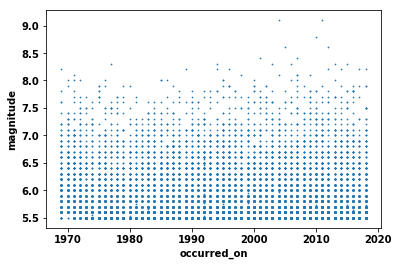

In [140]:
# Plotting the dataframe, we can see most earthquakes have a magnitude from 5.5 to 7.5
# Above 7.5 we start to see the earthquakes become more sparse
df.plot(x='occurred_on',y='magnitude',kind='scatter',s=0.5)

In [141]:
# Let's filter by earthquakes with mangiutdes larger than 7.5
# We transpose .describe() to make it more readable
df2 = df[df['magnitude']>7.5]
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
occurred_on,175.0,1996.942857,14.486900,1969.0,1986.5,2000.0,2009.0,2018.0
magnitude,175.0,7.837143,0.266831,7.6,7.6,7.8,7.9,9.1


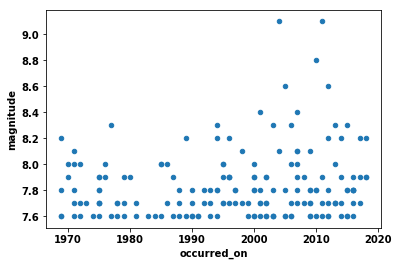

In [142]:
# Plotting this, it looks like the severity of large earthquakes are increasing
df2.plot(x='occurred_on',y='magnitude',kind='scatter')

In [143]:
# Let's have a look at the number of recorded earthquakes per year
df = df.groupby('occurred_on').count()
df.columns = ['frequency']
df

,frequency
occurred_on,
1969,322
1970,344
1971,386
1972,388
1973,394
1974,355
1975,401
1976,447
1977,417


In [144]:
# Let's sort this in descending order
# There doesn't seem to be any trend in the number of earthquakes per year
df.sort_values('frequency',ascending=False)

,frequency
occurred_on,
2011,713
2007,607
1995,587
2004,571
2010,560
2000,553
1996,540
2005,532
1992,532


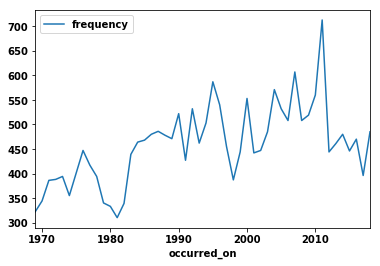

In [145]:
# Let's plot to confirm this
# The shape has a trend upwards
# This could be due to greater earthquake recording technology, and increased willingness from countries to record it
df.plot()